# Import packages

In [4]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

import importlib
import time
from sklearn.datasets import make_hastie_10_2
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import os

%config InlineBackend. figure_format = 'retina'

# Load Data via Pandas

In [5]:
# preprocess = "trimmed"
preprocess = "untrimmed"

HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN_DiHiggs/"
Data_High_Level_Features_path =  HOMEPATH + "Data_High_Level_Features/"


total_list = ['GEN', 'SHO', 'PRO', 'MJJ_0', 'delta_eta_0', 'MJ1_0', 'PTJ1_0',
       't211_0', 'D211_0', 'D221_0', 'C211_0', 'C221_0', 'MJ2_0', 'PTJ2_0',
       't212_0', 'D212_0', 'D222_0', 'C212_0', 'C222_0', 'MJJ', 'delta_eta',
       'MJ1', 'PTJ1', 't211', 'D211', 'D221', 'C211', 'C221', 'MJ2', 'PTJ2',
       't212', 'D212', 'D222', 'C212', 'C222', 'eventindex', 'index']

if os.path.exists(HOMEPATH + "Data_ML/BDT") == 0:
    os.mkdir(HOMEPATH + "Data_ML/BDT")
    datapath = HOMEPATH + "Data_ML/"
    savepath = HOMEPATH + "Data_ML/BDT" + "/"
else: 
    datapath = HOMEPATH + "Data_ML/"
    savepath = HOMEPATH + "Data_ML/BDT" + "/"

# herwig_ang_train = pd.read_csv(savepath + "herwig_ang_train"  + ".csv")
# herwig_ang_test = pd.read_csv(savepath + "herwig_ang_test" + ".csv")
# herwig_ang_val = pd.read_csv(savepath + "herwig_ang_val" + ".csv")

pythia_def_train = pd.read_csv(savepath + "pythia_def_train.csv")
pythia_def_test = pd.read_csv(savepath + "pythia_def_test.csv")
pythia_def_val = pd.read_csv(savepath + "pythia_def_val.csv")


# pythia_vin_train = pd.read_csv(savepath + "pythia_vin_train" + ".csv")
# pythia_vin_test = pd.read_csv(savepath + "pythia_vin_test" + ".csv")
# pythia_vin_val = pd.read_csv(savepath + "pythia_vin_val" + ".csv")


# pythia_dip_train = pd.read_csv(savepath + "pythia_dip_train" + ".csv")
# pythia_dip_test = pd.read_csv(savepath + "pythia_dip_test" + ".csv")
# pythia_dip_val = pd.read_csv(savepath + "pythia_dip_val" + ".csv")


# sherpa_def_train = pd.read_csv(savepath + "sherpa_def_train" + ".csv")
# sherpa_def_test = pd.read_csv(savepath + "sherpa_def_test" + ".csv")
# sherpa_def_val = pd.read_csv(savepath + "sherpa_def_val" + ".csv")


if preprocess == "trimmed":
    features = ["MJ1","t211","D211","D221","C211","C221"]
    
if preprocess == "untrimmed":   
#     features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"]
    features = ["MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"]


BDT_model_name = [
#                   "herwig_ang",
                  "pythia_def", 
#                   "pythia_vin", 
#                   "pythia_dip", 
#                   "sherpa_def"
                    ]

XTRAIN = [
#           herwig_ang_train[features],
          pythia_def_train[features],
#           pythia_vin_train[features],
#           pythia_dip_train[features],
#           sherpa_def_train[features]
            ]

YTRAIN = [
#           herwig_ang_train["target"],
          pythia_def_train["target"],
#          pythia_vin_train["target"],
#          pythia_dip_train["target"],
#          sherpa_def_train["target"]
            ]


XVAL = [
#          herwig_ang_val[features],
         pythia_def_val[features],
#          pythia_vin_val[features],
#          pythia_dip_val[features],
#          sherpa_def_val[features]
        ]

YVAL = [
#          herwig_ang_val["target"],
         pythia_def_val["target"],
#          pythia_vin_val["target"],
#          pythia_dip_val["target"],
#          sherpa_def_val["target"]
        ]


XTEST = [
#          herwig_ang_test[features],
         pythia_def_test[features],
#          pythia_vin_test[features],
#          pythia_dip_test[features],
#          sherpa_def_test[features]
        ]

YTEST = [
#          herwig_ang_test["target"],
         pythia_def_test["target"],
#          pythia_vin_test["target"],
#          pythia_dip_test["target"],
#          sherpa_def_test["target"]
            ]

print("H jet : QCD jet = 1 : 1")
print("\r")
print("{:^8}{:^15}".format("","Pythia Default"))
print("{:^8}{:^15}".format("Train #",len(pythia_def_train)))
print("{:^8}{:^15}".format("Test #",len(pythia_def_test)))
print("{:^8}{:^15}".format("Val. #",len(pythia_def_val)))

# print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default"))
# print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("Train #",len(herwig_ang_train),len(pythia_def_train),len(pythia_vin_train),len(pythia_dip_train),len(sherpa_def_train)))
# print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("Test #",len(herwig_ang_test),len(pythia_def_test),len(pythia_vin_test),len(pythia_dip_test),len(sherpa_def_test)))
# print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("Val. #",len(herwig_ang_val),len(pythia_def_val),len(pythia_vin_val),len(pythia_dip_val),len(sherpa_def_val)))


H jet : QCD jet = 1 : 1

        Pythia Default 
Train #     589226     
 Test #     126262     
 Val. #     126262     


# BDT Training

In [6]:
%time
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
############################################################################################################################################################
# features = ["MJ","t21","D21","D22","C21","C22"]
# features = ["MJ_0","t21_0","D21_0","D22_0","C21_0","C22_0"]


# BDT_model_name = ["herwig_ang", "pythia_def", "pythia_vin", "pythia_dip", "sherpa_def"]
BDT_model_name = ["pythia_def"]

# XTRAIN = [herwig_ang_train[features],pythia_def_train[features],
#          pythia_vin_train[features],pythia_dip_train[features],
#          sherpa_def_train[features]]

# YTRAIN = [herwig_ang_train["target"],pythia_def_train["target"],
#          pythia_vin_train["target"],pythia_dip_train["target"],
#          sherpa_def_train["target"]]

# savepath = HOMEPATH + "Data_ML/BDT" + "_" + str(preprocess)"/"

for i, element in enumerate(BDT_model_name):
    ticks_1 = time.time()
    
    GBDT, Ada = 0, 0
    for j, filename in enumerate(os.listdir(savepath)):
        if filename == BDT_model_name[i]+"_GBDT" + "_" + str(preprocess) + ".h5" :
            GBDT += 1 
#         elif filename == BDT_model_name[i]+"_AdaBoost.h5" :
#             Ada += 1 

    if GBDT == 0:
        rand = np.random.randint(1000000)
        clf_GBDT = GradientBoostingClassifier(
                    n_estimators=1000,
                    learning_rate=0.02,
                    max_depth=5, 
                    min_samples_split = 0.25,
                    min_samples_leaf = 0.05,
        #             min_impurity_split = 0.00001,
        #             validation_fraction = 0.1,
                    random_state= rand,  #np.random,
                    verbose = 1
                    )
        clf_GBDT.fit(XTRAIN[i] ,YTRAIN[i])
        dump(clf_GBDT, savepath + BDT_model_name[i] + "_GBDT" + "_" + str(preprocess) + ".h5")

    ticks_2 = time.time()

    # if Ada == 0:
    #     clf_Ada = AdaBoostClassifier(
    #             DecisionTreeClassifier(max_depth=2),
    #             n_estimators=500,
    #             learning_rate=1)

    #     clf_Ada.fit(XTRAIN[i] ,YTRAIN[i])
    #     dump(clf_Ada, savepath + BDT_model_name[i] + "_AdaBoost.h5")

    if GBDT == 1:
        clf_GBDT = load(savepath + BDT_model_name[i] + "_GBDT" + "_" + str(preprocess) + ".h5")

#     if Ada == 1:
#         clf_Ada = load(savepath + BDT_model_name[i] + "_AdaBoost.h5")

    ############################################################################################################################################################
    ticks_3 = time.time()
    totaltime =  ticks_2 - ticks_1
    print("\033[3;33mTime consumption : {:.4f} min for GBDT\033[0;m".format(totaltime/60.))
#     totaltime =  ticks_3 - ticks_2
#     print("\033[3;33mTime consumption : {:.4f} min for AdaBDT\033[0;m".format(totaltime/60.))


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.2 µs
Thu Jun 24 00:16:01 2021
Time consumption : 0.0000 min for GBDT


# Study the Performance of BDT

In [6]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

BDT_Model = [
#              "herwig_ang", 
             "pythia_def",
#              "pythia_vin", 
#              "pythia_dip", 
#              "sherpa_def"
            ]
BDT_model_name = [
#                  "Herwig Angular", 
                 "Pythia Default",
#                  "Pythia Vincia", 
#                  "Pythia Dipole", 
#                  "Sherpa Default"
                ]

XTEST = [
#          herwig_ang_test[features],
         pythia_def_test[features],
#          pythia_vin_test[features],
#          pythia_dip_test[features],
#          sherpa_def_test[features]
            ]

YTEST = [
#          herwig_ang_test["target"],
         pythia_def_test["target"],
#          pythia_vin_test["target"],
#          pythia_dip_test["target"],
#          sherpa_def_test["target"]
            ]

AUC = np.zeros((5,5))
max_sig = np.zeros((5,5))
r05 = np.zeros((5,5))

for i, model in enumerate(BDT_Model):
#     print(model)
    for j, test_generator in enumerate(XTEST):
        
        clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")

        prediction_GBDT_test = clf_GBDT.predict_proba(test_generator)

        discriminator_test = prediction_GBDT_test[:,1]

        discriminator_test = discriminator_test/(max(discriminator_test))

        AUC[i,j] = metrics.roc_auc_score(YTEST[i],discriminator_test)
        FalsePositiveFull, TruePositiveFull, _ = metrics.roc_curve(YTEST[i],discriminator_test)
        
#         print(len(FalsePositiveFull_GBDT_test),len(TruePositiveFull_GBDT_test),len(YTEST[i]))
#         aaa = np.where(TruePositiveFull > 0.1)
        aaa = np.where(FalsePositiveFull != 0)
#         print(FalsePositiveFull[:aaa[0][0]], TruePositiveFull[:aaa[0][0]])
        max_sig[i,j] = max(TruePositiveFull[aaa]/np.sqrt(FalsePositiveFull[aaa])) 
        bbb = np.where(TruePositiveFull >= 0.5)
        r05[i,j] = 1./FalsePositiveFull[bbb[0][0]]

print("Models are trained by row and test to column.")
print("Performance in AUC")
print("\r")
print("{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default"))
for i in range(5):
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format(BDT_model_name[0],AUC[i,0], AUC[i,1], AUC[i,2], AUC[i,3], AUC[i,4]))
print("\r")
print("Performance in Max Significance")
print("\r")
for i in range(5):
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format(BDT_model_name[0],max_sig[i,0], max_sig[i,1], max_sig[i,2], max_sig[i,3], max_sig[i,4]))
print("\r")
print("1/fpr @ tpr = 0.5 (rejection at 50% signal efficiency)")
print("\r")
for i in range(5):
    print("{:^15}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}{:^15.3f}".format(BDT_model_name[0],r05[i,0], r05[i,1], r05[i,2], r05[i,3], r05[i,4]))





Models are trained by row and test to column.
Performance in AUC

               Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole Sherpa Default 
Pythia Default      0.761          0.000          0.000          0.000          0.000     
Pythia Default      0.000          0.000          0.000          0.000          0.000     
Pythia Default      0.000          0.000          0.000          0.000          0.000     
Pythia Default      0.000          0.000          0.000          0.000          0.000     
Pythia Default      0.000          0.000          0.000          0.000          0.000     

Performance in Max Significance

Pythia Default      1.462          0.000          0.000          0.000          0.000     
Pythia Default      0.000          0.000          0.000          0.000          0.000     
Pythia Default      0.000          0.000          0.000          0.000          0.000     
Pythia Default      0.000          0.000          0.000          0.000          0

# Feature Importances

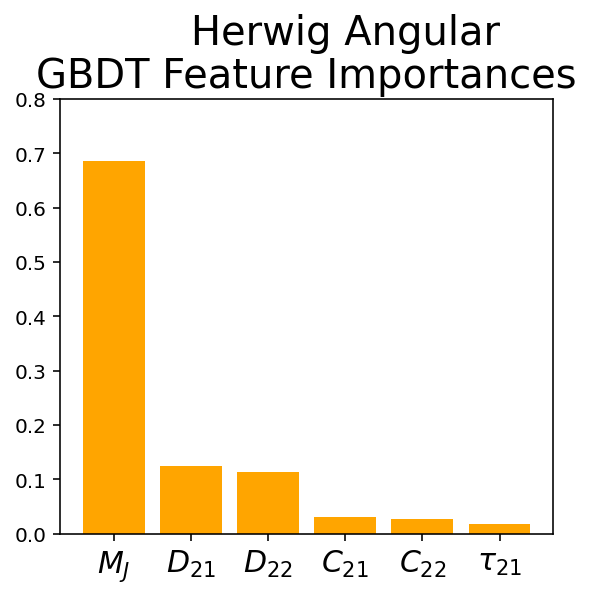

In [17]:
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]
feature_namelist = ["$M_J$","$\\tau_{21}$","$D_{21}$","$D_{22}$","$C_{21}$","$C_{22}$"]

plt.figure(figsize=(15,10))
for i, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,i+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")

    importances = clf_GBDT.feature_importances_
    # std = np.std([tree.feature_importances_ for tree in clf_GBDT.estimators_],
    #              axis=0)
    indices = np.argsort(importances)[::-1]
    namelist_inorder = []
    for index in indices:
        namelist_inorder.append(feature_namelist[index])
    
    plt.title("GBDT Feature Importances",fontsize=20)

    plot_axis.bar(range(XTRAIN[i].shape[1]), 
             importances[indices],
             color="orange", 
    #          yerr=std[indices], 
             align="center")
    
    plot_axis.set_ylim((0,0.8))
    plot_axis.text(x=1, y=0.9, s=str(BDT_model_name[i]),fontsize=20) 
    plot_axis.set_xticks([0,1,2,3,4,5])
    plot_axis.set_xticklabels(namelist_inorder, rotation= 0, fontsize=15)
    

#     plot_axis.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)
#     plot_axis.grid(True)
    

# plt.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)
# plt.xlim([-1, X_train.shape[1]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

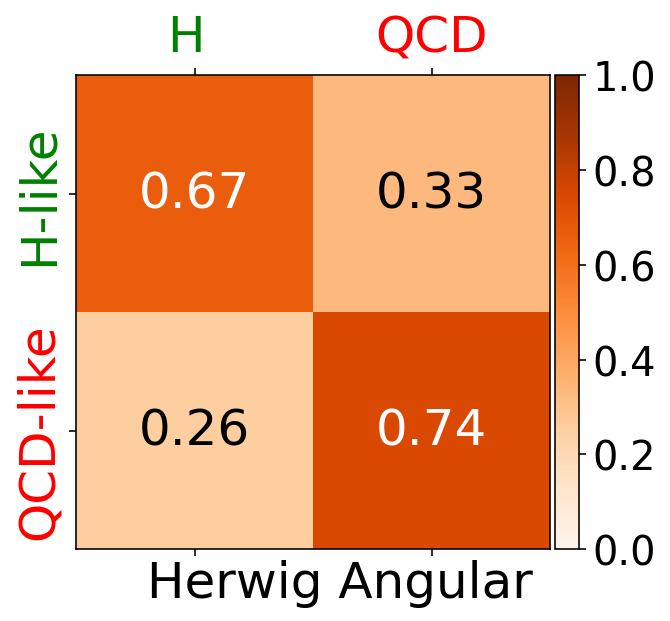

In [18]:
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]
feature_namelist = ["$M_J$","$\\tau_{21}$","$D_{21}$","$D_{22}$","$C_{21}$","$C_{22}$"]

plt.figure(figsize=(18,12))
for index, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,index+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")
    confusion = confusion_matrix(YTEST[index], clf_GBDT.predict(XTEST[index]))
    
 

    ratio, eff = np.zeros(16), np.zeros(16)
    k = 0
    for i in range(2):
        for j in range(2):
            ratio[k] = (confusion[j][i]/np.sum(confusion,axis=0)[i])*100.
            eff[k] = (confusion[i][j]/np.sum(confusion,axis=1)[i])*100.
            k += 1

#     print("{:^8}  {:^8} {:^8} {:^9} {:^9} ".format("","No ratio","Yes ratio","No eff.","Yes eff."))
#     print("{:^8}  {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} ".format("No-like",ratio[0],ratio[1],eff[0],eff[2]))
#     print("{:^8}  {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} ".format("Yes-like",ratio[2],ratio[3],eff[1],eff[3]))

    truelist = ["H ","QCD"]
    likelist = ["H-like","QCD-like"]

    s = len(truelist)
#     f, ax = plt.subplots(1,1, figsize=(s+5, s+5))

    confusion_ = np.array([[ ratio[0],ratio[1]],
                           [ ratio[2],ratio[3]]])/100.

    aa = plot_axis.matshow(confusion_, cmap="Oranges",vmin=0, vmax=1)

    divider = make_axes_locatable(plot_axis)
    cax = divider.append_axes("right", size="5%", pad="1%")
    cbar = plt.colorbar(aa, cax=cax)
    cbar.ax.tick_params(labelsize=20)

    plot_axis.set_xticks(range(confusion_.shape[1]))
    plot_axis.set_xticklabels(truelist, fontsize=25, rotation=0)
    plot_axis.set_yticks(range(confusion_.shape[1]))
    plot_axis.set_yticklabels(likelist, fontsize=25, rotation=90, verticalalignment ="center")
    my_colors = ["green","red","blue","magenta"]

    for ticklabel, tickcolor in zip(plot_axis.get_xticklabels(), my_colors):
        ticklabel.set_color(tickcolor)

    for ticklabel, tickcolor in zip(plot_axis.get_yticklabels(), my_colors):
        ticklabel.set_color(tickcolor)

    for (i, j), z in np.ndenumerate(confusion_):
        if z >=0.5:
            colors = "white"
        elif z <= -0.5:
            colors = "red"
        else :
            colors = "black"
        plot_axis.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',fontsize=25,color=colors)
    
    
#     plot_axis.text(0.2, -0.8, "True", color = "green",fontsize=25)
#     plot_axis.text(-1.1, 1.2, "Predicted", color = "blue", rotation=90,fontsize=25)
    plot_axis.text(x=-0.2, y=1.7, s=str(BDT_model_name[index]),fontsize=25) 


    


# plt.tight_layout()
# plt.savefig("./Figures/confusion_matrix.pdf", transparent=True, bbox_inches='tight', pad_inches=0)
plt.subplots_adjust(wspace=0.5, hspace=0.0)
plt.show()

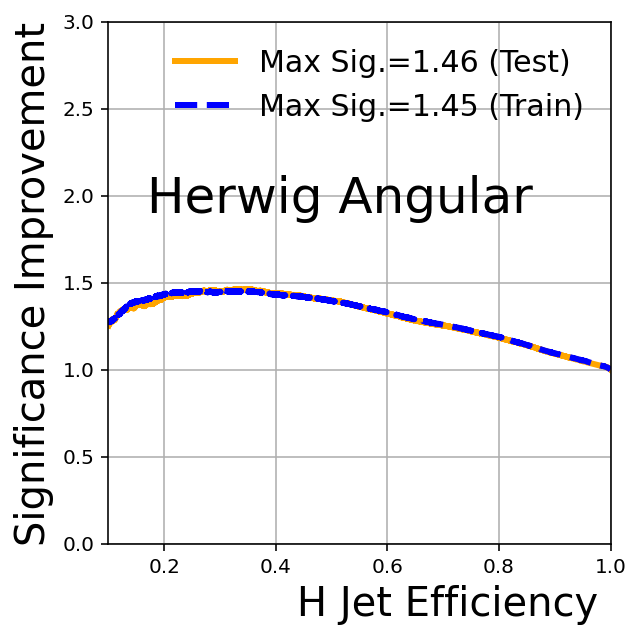

In [19]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

plt.figure(figsize=(18,12))
for i, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,i+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")

#     plot_axis.text(x=1, y=0.7, s=str(BDT_model_name[i]),fontsize=20) 
#     plot_axis.set_xticks([0,1,2,3,4,5])
#     plot_axis.set_xticklabels(namelist_inorder, rotation= 0, fontsize=15)


    prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
    prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])


    # prediction_Ada_test = clf_Ada.predict_proba(X_test)
    # prediction_Ada_train = clf_Ada.predict_proba(X_train)


    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_GBDT_test = metrics.roc_auc_score(YTEST[i],discriminator_test)
    FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(YTEST[i],discriminator_test)

    train_auc_GBDT_train = metrics.roc_auc_score(YTRAIN[i],discriminator_train)
    FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(YTRAIN[i],discriminator_train)
 
    # plt.plot(TruePositiveFull_GBDT_test,1./FalsePositiveFull_GBDT_test,"--", color='b', linewidth = 5, label='BDT: AUC={0:.2f}'.format(test_auc_GBDT_test))
#     a = np.where(TruePositiveFull_GBDT_test > 0.1)
#     b = np.where(TruePositiveFull_GBDT_train > 0.1)
    a = np.where(FalsePositiveFull_GBDT_test != 0)
    b = np.where(FalsePositiveFull_GBDT_train != 0)
    
    max_sig_test = max(TruePositiveFull_GBDT_test[a]/np.sqrt(FalsePositiveFull_GBDT_test[a]))
    max_sig_train = max(TruePositiveFull_GBDT_train[b]/np.sqrt(FalsePositiveFull_GBDT_train[b]))
    plt.plot(TruePositiveFull_GBDT_test[a],TruePositiveFull_GBDT_test[a]/np.sqrt(FalsePositiveFull_GBDT_test[a]),"-", color='orange', linewidth = 3, label='Max Sig.={0:.2f} (Test)'.format(max_sig_test))
    plt.plot(TruePositiveFull_GBDT_train[b],TruePositiveFull_GBDT_train[b]/np.sqrt(FalsePositiveFull_GBDT_train[b]),"--", color='b', linewidth = 3, label='Max Sig.={0:.2f} (Train)'.format(max_sig_train))

# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

    plot_axis.set_xlim((0.1,1))
    plot_axis.set_ylim((0,3))
    # plt.yscale("log")
    plt.xlim((0,1))
#     plt.ylim((1, 1E+4))
#     plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel(str(process)+' Efficiency ', fontsize=20,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('Significance Improvement', fontsize=20,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
    plot_axis.text(x=0.17, y=1.9, s=str(BDT_model_name[i]),fontsize=25) 
    #     plt.tight_layout()

    plot_axis.set_xlim((0.1,1))
#     plot_axis.set_ylim((1, 2E+2))
#     plot_axis.set_yscale("log")
    plot_axis.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

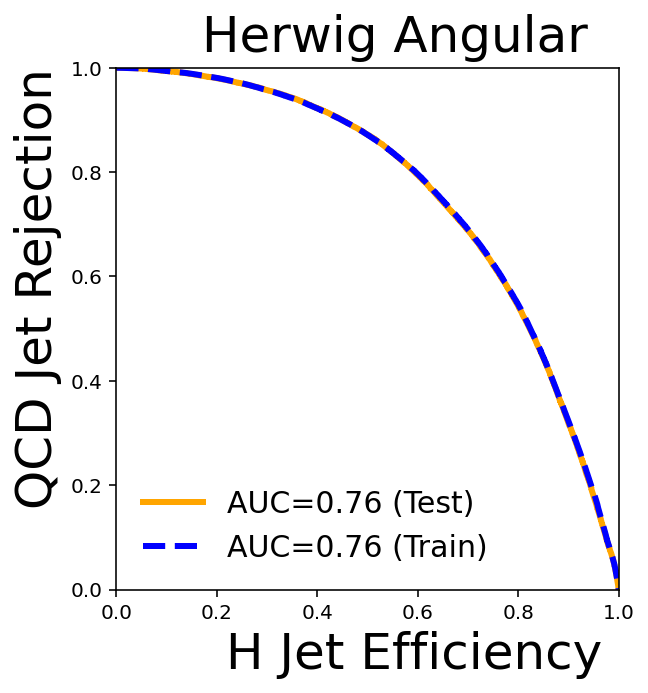

In [20]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

    
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

plt.figure(figsize=(18,12))
for i, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,i+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")

#     plot_axis.text(x=1, y=0.7, s=str(BDT_model_name[i]),fontsize=20) 
#     plot_axis.set_xticks([0,1,2,3,4,5])
#     plot_axis.set_xticklabels(namelist_inorder, rotation= 0, fontsize=15)


    prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
    prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])


    # prediction_Ada_test = clf_Ada.predict_proba(X_test)
    # prediction_Ada_train = clf_Ada.predict_proba(X_train)


    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))
    


    test_auc_GBDT_test = metrics.roc_auc_score(YTEST[i],discriminator_test)
    FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(YTEST[i],discriminator_test)

    train_auc_GBDT_train = metrics.roc_auc_score(YTRAIN[i],discriminator_train)
    FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(YTRAIN[i],discriminator_train)
 
    # plt.plot(TruePositiveFull_GBDT_test,1./FalsePositiveFull_GBDT_test,"--", color='b', linewidth = 5, label='BDT: AUC={0:.2f}'.format(test_auc_GBDT_test))

    plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_GBDT_test))
    plt.plot(TruePositiveFull_GBDT_train,1-FalsePositiveFull_GBDT_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_GBDT_train))
#     plt.plot(TruePositiveFull_GBDT_test[50:]/(FalsePositiveFull_GBDT_test[50:])**0.5, label="aaa") 


# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')

    plot_axis.set_xlim((0,1))
    plot_axis.set_ylim((0,1))
    # plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
    plot_axis.set_xlabel(str(process)+' Efficiency ', fontsize=25,horizontalalignment='right',x=1)
    plot_axis.set_ylabel('QCD Jet Rejection', fontsize=25,horizontalalignment='right',y=1)
    plot_axis.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
#     plt.tight_layout()
    plot_axis.text(x=0.17, y=1.03, s=str(BDT_model_name[i]),fontsize=25) 

# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

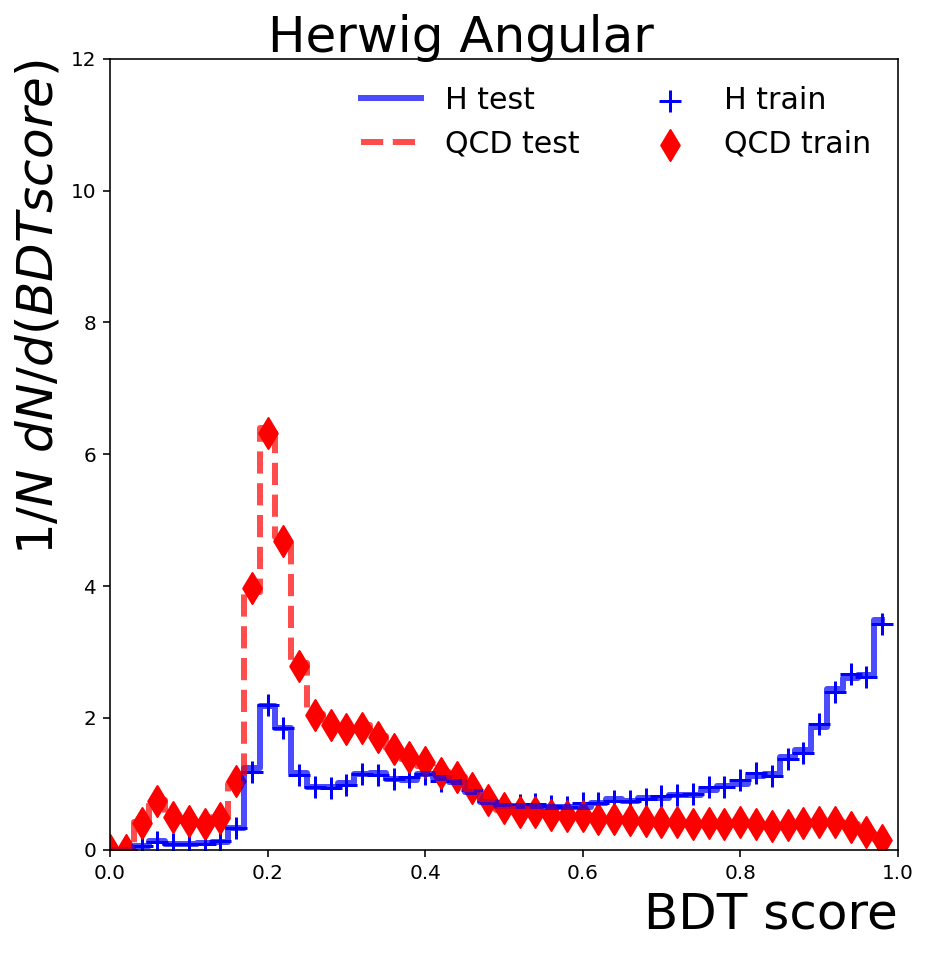

In [21]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

    
BDT_model_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

plt.figure(figsize=(24,16))
for i, model in enumerate(BDT_Model):
    plot_axis = plt.subplot(2,3,i+1)

    clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")
    
    prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
    prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])
    
    discriminator_test = prediction_GBDT_test[:,axis]
    discriminator_train = prediction_GBDT_train[:,axis]

    discriminator_test = discriminator_test/(max(discriminator_test))
    discriminator_train = discriminator_train/(max(discriminator_train))

    xbin = np.linspace(0,1,51)
    Datatest = pd.DataFrame()
    Datatest["target"] = to_categorical(YTEST[i])[:,axis]
    Datatest["pre"] = discriminator_test
    inner = Datatest[Datatest["target"]==1]
    outter = Datatest[Datatest["target"]==0]

    H_hist, H_bins = np.histogram(inner["pre"], bins=xbin)
    plot_axis.step(H_bins[:-1], H_hist.astype(np.float32)/sum(H_hist)/0.02, "-",color = "blue", where='mid',linewidth=3, alpha=0.7,label="H test") 
    QCD_hist, QCD_bins = np.histogram(outter["pre"], bins=xbin)
    plot_axis.step(QCD_bins[:-1], QCD_hist.astype(np.float32)/sum(QCD_hist)/0.02, "--",color = "red", where='mid',linewidth=3, alpha=0.7,label="QCD test") 


    Datatrain = pd.DataFrame()
    Datatrain["target"] = to_categorical(YTRAIN[i])[:,axis]
    Datatrain["pre_train"] = discriminator_train
    inner = Datatrain[Datatrain["target"]==1]
    outter = Datatrain[Datatrain["target"]==0]

    H_hist, H_bins = np.histogram(inner["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
    plot_axis.scatter(H_bins[:-1], H_hist.astype(np.float32)/sum(H_hist)/0.02 ,marker = "+",c ="b",s=120,label="H train")
    QCD_hist, QCD_bins = np.histogram(outter["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
    plot_axis.scatter(QCD_bins[:-1], QCD_hist.astype(np.float32)/sum(QCD_hist)/0.02 ,marker = "d",c ="r",s=120,label="QCD train")
    
    

    plot_axis.set_xlim(0,1)
    plot_axis.set_ylim(0,12)
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
    plot_axis.set_xlabel("BDT score", fontsize=25,horizontalalignment='right',x=1)
    plot_axis.set_ylabel("$1/N\,\,dN/d (BDT score)$",fontsize=25,horizontalalignment='right',y=1)
    plot_axis.legend(loc="best",ncol=2,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0)
    plot_axis.text(x=0.2, y=12.1, s=str(BDT_model_name[i]),fontsize=25) 
        
# plt.savefig("./Higgs_Pt/BDT_score.pdf", transparent=True)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

/usr/local/python3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/python3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/python3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/python3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/python3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


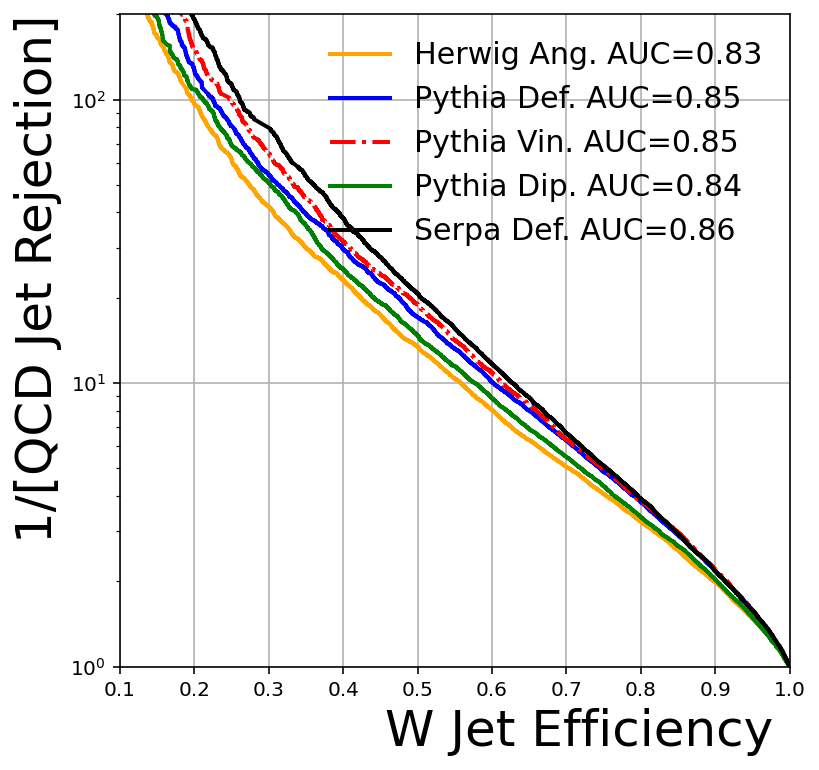

In [13]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"

plt.figure(figsize=(6,6))


clf_GBDT = load(savepath + "Pythia Default" + "_GBDT" + "_" + str(preprocess) + ".h5")

prediction_CNN_herwig_ang = clf_GBDT.predict_proba(XTEST[0])[:,axis]
prediction_CNN_pythia_def = clf_GBDT.predict_proba(XTEST[1])[:,axis]
prediction_CNN_pythia_vin= clf_GBDT.predict_proba(XTEST[2])[:,axis]
prediction_CNN_pythia_dip = clf_GBDT.predict_proba(XTEST[3])[:,axis]
prediction_CNN_sherpa_def = clf_GBDT.predict_proba(XTEST[4])[:,axis]




# discriminator_test = discriminator_test/(max(discriminator_test))
# discriminator_train = discriminator_train/(max(discriminator_train))
    


test_auc_herwig_ang = metrics.roc_auc_score(YTEST[0],prediction_CNN_herwig_ang)
FalsePositiveFull_herwig_ang, TruePositiveFull_herwig_ang, _ = metrics.roc_curve(YTEST[0],prediction_CNN_herwig_ang)

test_auc_pythia_def = metrics.roc_auc_score(YTEST[1],prediction_CNN_pythia_def)
FalsePositiveFull_pythia_def, TruePositiveFull_pythia_def, _ = metrics.roc_curve(YTEST[1],prediction_CNN_pythia_def)

test_auc_pythia_vin = metrics.roc_auc_score(YTEST[2],prediction_CNN_pythia_vin)
FalsePositiveFull_pythia_vin, TruePositiveFull_pythia_vin, _ = metrics.roc_curve(YTEST[2],prediction_CNN_pythia_vin)

test_auc_pythia_dip = metrics.roc_auc_score(YTEST[3],prediction_CNN_pythia_dip)
FalsePositiveFull_pythia_dip, TruePositiveFull_pythia_dip, _ = metrics.roc_curve(YTEST[3],prediction_CNN_pythia_dip)

test_auc_sherpa_def = metrics.roc_auc_score(YTEST[4],prediction_CNN_sherpa_def)
FalsePositiveFull_sherpa_def, TruePositiveFull_sherpa_def, _ = metrics.roc_curve(YTEST[4],prediction_CNN_sherpa_def)

#     plt.plot(TruePositiveFull_CNN_test,1-FalsePositiveFull_CNN_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_CNN_test))
#     plt.plot(TruePositiveFull_CNN_train,1-FalsePositiveFull_CNN_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_CNN_train))
plt.plot(TruePositiveFull_herwig_ang,1./FalsePositiveFull_herwig_ang,"-", color='orange', linewidth = 2, label='Herwig Ang. AUC={0:.2f}'.format(test_auc_herwig_ang))
plt.plot(TruePositiveFull_pythia_def,1./FalsePositiveFull_pythia_def,"-", color='b', linewidth = 2, label='Pythia Def. AUC={0:.2f}'.format(test_auc_pythia_def))
plt.plot(TruePositiveFull_pythia_vin,1./FalsePositiveFull_pythia_vin,"-.", color='r', linewidth = 2, label='Pythia Vin. AUC={0:.2f}'.format(test_auc_pythia_vin))
plt.plot(TruePositiveFull_pythia_dip,1./FalsePositiveFull_pythia_dip,"-", color='g', linewidth = 2, label='Pythia Dip. AUC={0:.2f}'.format(test_auc_pythia_dip))
plt.plot(TruePositiveFull_sherpa_def,1./FalsePositiveFull_sherpa_def,"-", color='k', linewidth = 2, label='Serpa Def. AUC={0:.2f}'.format(test_auc_sherpa_def))

# plt.scatter(0.75,1./0.32, marker="D", s=300 , c='b')
# plt.scatter(0.70,1./0.13, marker="D", s=300 , c='orange')


plt.xlim((0.1,1))
plt.ylim((1, 2E+2))
plt.yscale("log")
#     plot_axis.set_tick_params(axis='x', labelsize=25)
#     plot_axis.set_tick_params(axis='y', labelsize=25)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5))
plt.xlabel(str(process)+' Efficiency ', fontsize=25,horizontalalignment='right',x=1)
plt.ylabel('1/[QCD Jet Rejection]', fontsize=25,horizontalalignment='right',y=1)
plt.legend(ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
#     plt.tight_layout()
# plt.text(x=0.17, y=1.03, s=str(CNN_model_name[i]),fontsize=25) 
plt.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

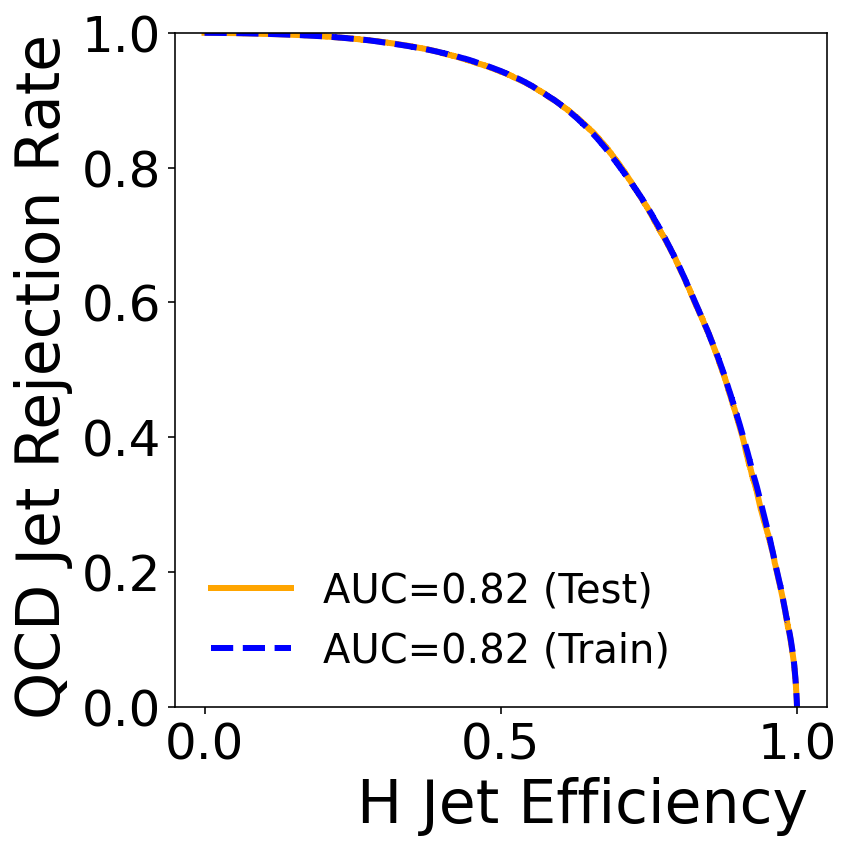

In [42]:
axis = 1
if axis == 0:
    process = "QCD"
elif axis == 1:
    process = "H Jet"


clf_GBDT = load(savepath + model + "_GBDT" + "_" + str(preprocess) + ".h5")




features = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"]
# features = ["MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"]


BDT_model_name = [
#                   "herwig_ang",
                  "pythia_def", 
#                   "pythia_vin", 
#                   "pythia_dip", 
#                   "sherpa_def"
                    ]

XTRAIN = [
#           herwig_ang_train[features],
          pythia_def_train[features],
#           pythia_vin_train[features],
#           pythia_dip_train[features],
#           sherpa_def_train[features]
            ]

YTRAIN = [
#           herwig_ang_train["target"],
          pythia_def_train["target"],
#          pythia_vin_train["target"],
#          pythia_dip_train["target"],
#          sherpa_def_train["target"]
            ]

XTEST = [
#          herwig_ang_test[features],
         pythia_def_test[features],
#          pythia_vin_test[features],
#          pythia_dip_test[features],
#          sherpa_def_test[features]
        ]

YTEST = [
#          herwig_ang_test["target"],
         pythia_def_test["target"],
#          pythia_vin_test["target"],
#          pythia_dip_test["target"],
#          sherpa_def_test["target"]
            ]


i = 0
prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])


discriminator_test = prediction_GBDT_test[:,axis]
discriminator_train = prediction_GBDT_train[:,axis]

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))


test_auc_GBDT_test = metrics.roc_auc_score(YTEST[i],discriminator_test)
FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(YTEST[i],discriminator_test)

train_auc_GBDT_train = metrics.roc_auc_score(YTRAIN[i],discriminator_train)
FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(YTRAIN[i],discriminator_train)


fig, ax = plt.subplots(1,1, figsize=(6,6))


# plt.plot(TruePositiveFull_GBDT_test,1/FalsePositiveFull_GBDT_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_GBDT_test))
# plt.plot(TruePositiveFull_GBDT_train,1/FalsePositiveFull_GBDT_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_GBDT_train))
# plt.ylim((1,1E+4))
# plt.yscale("log")


plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test,"-", color='orange', linewidth = 3, label='AUC={0:.2f} (Test)'.format(test_auc_GBDT_test))
plt.plot(TruePositiveFull_GBDT_train,1-FalsePositiveFull_GBDT_train,"--", color='b', linewidth = 3, label='AUC={0:.2f} (Train)'.format(train_auc_GBDT_train))
plt.ylim((0,1))



ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.ylabel('QCD Jet Rejection Rate', fontsize=30,horizontalalignment='right',y=1)
plt.xlabel(str(process)+' Efficiency ', fontsize=30,horizontalalignment='right',x=1)
plt.legend(ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()


# plt.savefig("./Plots/Comparison_ROC_all.pdf", transparent=True, bbox_inches='tight')
plt.show()

# $H$ Tagger applied on leading jet and sub-leading jet

In [13]:
clf_GBDT = load(savepath + "pythia_def" + "_GBDT" + "_" + str(preprocess) + ".h5")




features_j1 = ["MJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0"]

BDT_model_name = [
#                   "herwig_ang",
                  "pythia_def", 
#                   "pythia_vin", 
#                   "pythia_dip", 
#                   "sherpa_def"
                    ]

XTRAIN = [
#           herwig_ang_train[features],
          pythia_def_train[features_j1],
#           pythia_vin_train[features],
#           pythia_dip_train[features],
#           sherpa_def_train[features]
            ]

YTRAIN = [
#           herwig_ang_train["target"],
          pythia_def_train["target"],
#          pythia_vin_train["target"],
#          pythia_dip_train["target"],
#          sherpa_def_train["target"]
            ]

XTEST = [
#          herwig_ang_test[features],
         pythia_def_test[features_j1],
#          pythia_vin_test[features],
#          pythia_dip_test[features],
#          sherpa_def_test[features]
        ]

YTEST = [
#          herwig_ang_test["target"],
         pythia_def_test["target"],
#          pythia_vin_test["target"],
#          pythia_dip_test["target"],
#          sherpa_def_test["target"]
            ]


i = 0
prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])

axis = 1
discriminator_test = prediction_GBDT_test[:,axis]
discriminator_train = prediction_GBDT_train[:,axis]

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))

pythia_def_train["predict_j1"] = discriminator_train
pythia_def_test["predict_j1"] = discriminator_test

features_j2 = ["MJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0"]

XTRAIN = [
#           herwig_ang_train[features],
          pythia_def_train[features_j2],
#           pythia_vin_train[features],
#           pythia_dip_train[features],
#           sherpa_def_train[features]
            ]

YTRAIN = [
#           herwig_ang_train["target"],
          pythia_def_train["target"],
#          pythia_vin_train["target"],
#          pythia_dip_train["target"],
#          sherpa_def_train["target"]
            ]

XTEST = [
#          herwig_ang_test[features],
         pythia_def_test[features_j2],
#          pythia_vin_test[features],
#          pythia_dip_test[features],
#          sherpa_def_test[features]
        ]

YTEST = [
#          herwig_ang_test["target"],
         pythia_def_test["target"],
#          pythia_vin_test["target"],
#          pythia_dip_test["target"],
#          sherpa_def_test["target"]
            ]



prediction_GBDT_test = clf_GBDT.predict_proba(XTEST[i])
prediction_GBDT_train = clf_GBDT.predict_proba(XTRAIN[i])


discriminator_test = prediction_GBDT_test[:,axis]
discriminator_train = prediction_GBDT_train[:,axis]

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))

pythia_def_train["predict_j2"] = discriminator_train
pythia_def_test["predict_j2"] = discriminator_test


* Selected efficiency of leading jet: 0.5

* Selected efficiency of sub-leading jet: 0.8



In [18]:
sample = pythia_def_test
eff1j = 0.5
eff2j = 0.8

H = sample[sample["target"] == 1]
QCD = sample[sample["target"] == 0]
a = len(H)
a_ = len(QCD)
print("Original # of H: {} and # of QCD: {} ".format(a,a_))
print("#########")
cut_j1 = 0
for i in range(0,1001):
    tmp = H[H["predict_j1"] >= cut_j1]
    
    if len(tmp)/len(H) < eff1j:
        print("cut_j1: {:.3f}".format(cut_j1))
        break
        
    cut_j1 += 1/1000
    
    
H = sample[(sample["target"] == 1) & (sample["predict_j1"] >= cut_j1)]
QCD = sample[(sample["target"] == 0) & (sample["predict_j1"] >= cut_j1)]
b = len(H)
b_ = len(QCD)
print("Passing 1st jet BDT cut at eff.: {} # of H: {} and # of QCD: {} ".format(eff1j,b,b_))
print("total rate: H: {:.3f} QCD: {:.6f} ".format(b/a,b_/a_))
print("#########")

cut_j2 = 0
for i in range(0,1001):
    tmp = H[H["predict_j2"] >= cut_j2]
    
    if len(tmp)/len(H) < eff2j:
        print("cut_j2: {:.3f}".format(cut_j2))
        break
        
    cut_j2 += 1/1000

H = sample[(sample["target"] == 1) & (sample["predict_j1"] >= cut_j1) & (sample["predict_j2"] >= cut_j2)]
QCD = sample[(sample["target"] == 0) & (sample["predict_j1"] >= cut_j1) & (sample["predict_j2"] >= cut_j2)]
c = len(H)
c_ = len(QCD)
print("Passing 2nd jet BDT cut at eff.: {} # of H: {} and # of QCD: {} ".format(eff2j,c,c_))
print("total rate: H: {:.3f} QCD: {:.6f} ".format(c/a,c_/a_))
print("#########")
H = H[H["two_B_tag"] == 1]
QCD = QCD[QCD["two_B_tag"] == 1]
d = len(H)
d_ = len(QCD)
print("Passing 4b tag: # of H: {} and # of QCD: {} ".format(d,d_))
# print(d/c,d_/c_)
print("total rate: H: {:.3f} QCD: {:.6f} ".format(d/a,d_/a_))

Original # of H: 63131 and # of QCD: 63131 
#########
cut_j1: 0.750
Passing 1st jet BDT cut at eff.: 0.5 # of H: 31530 and # of QCD: 3621 
total rate: H: 0.499 QCD: 0.057357 
#########
cut_j2: 0.315
Passing 2nd jet BDT cut at eff.: 0.8 # of H: 25211 and # of QCD: 1615 
total rate: H: 0.399 QCD: 0.025582 
#########
Passing 4b tag: # of H: 23317 and # of QCD: 650 
total rate: H: 0.369 QCD: 0.010296 
